In [1]:
# !pip install xgboost
# !pip install pyarrow

In [2]:
# !pip install pycaret[analysis]

In [3]:
# !pip install shap

In [4]:
# !pip install pycaret --ignore-installed llvmlite numba

In [5]:
from pycaret.classification import *

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import xgboost as xgb
root = 'C:/Users/Pratham/Documents/GitHub/instacart-customer-purchase-prediction/data/'
from sklearn.neural_network import MLPClassifier
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [7]:
order_products = pd.read_parquet(root + 'order_products.parquet')

In [8]:
order_products.shape

(33819106, 15)

In [9]:
# filter data where eval_set = 'train'

order_products = order_products[order_products.eval_set == 'train']

In [10]:
order_products.shape

(1384617, 15)

In [11]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1384617 entries, 32434489 to 33819105
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int32  
 1   product_id              1384617 non-null  int32  
 2   add_to_cart_order       1384617 non-null  int16  
 3   reordered               1384617 non-null  int8   
 4   product_name            1384617 non-null  object 
 5   aisle_id                1384617 non-null  int16  
 6   department_id           1384617 non-null  int8   
 7   aisle                   1384617 non-null  object 
 8   department              1384617 non-null  object 
 9   user_id                 1384617 non-null  int32  
 10  eval_set                1384617 non-null  object 
 11  order_number            1384617 non-null  int8   
 12  order_dow               1384617 non-null  int8   
 13  order_hour_of_day       1384617 non-null  int8   
 14 

In [12]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
32434489,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
32434490,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
32434491,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
32434492,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
32434493,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


In [13]:
exp_clf = setup(order_products, target = 'reordered',session_id = 2 , fold=3, max_encoding_ohe=100,memory=False, ignore_features=['aisle_id','order_id', 'product_id', 'user_id','department_id', 'eval_set'],categorical_features=['aisle', 'department','product_name','order_dow','order_hour_of_day'],numeric_imputation=0)

,Description,Value
0,Session id,2
1,Target,reordered
2,Target type,Binary
3,Original data shape,"(1384617, 15)"
4,Transformed data shape,"(1384617, 58)"
5,Transformed train set shape,"(969231, 58)"
6,Transformed test set shape,"(415386, 58)"
7,Ignore features,6
8,Numeric features,3
9,Categorical features,5


In [14]:
prep_pipe = get_config('X_train_transformed') 
prep_pipe.head()

,add_to_cart_order,product_name,aisle,department_produce,department_beverages,department_pantry,department_household,department_personal care,department_canned goods,department_frozen,department_dairy eggs,department_breakfast,department_snacks,department_meat seafood,department_dry goods pasta,department_bakery,department_deli,department_pets,department_other,department_bulk,department_babies,department_alcohol,department_missing,department_international,order_number,order_dow_5.0,order_dow_0.0,order_dow_1.0,order_dow_4.0,order_dow_3.0,order_dow_2.0,order_dow_6.0,order_hour_of_day_17.0,order_hour_of_day_13.0,order_hour_of_day_14.0,order_hour_of_day_8.0,order_hour_of_day_18.0,order_hour_of_day_9.0,order_hour_of_day_10.0,order_hour_of_day_16.0,order_hour_of_day_20.0,order_hour_of_day_12.0,order_hour_of_day_6.0,order_hour_of_day_19.0,order_hour_of_day_11.0,order_hour_of_day_4.0,order_hour_of_day_15.0,order_hour_of_day_7.0,order_hour_of_day_22.0,order_hour_of_day_1.0,order_hour_of_day_21.0,order_hour_of_day_2.0,order_hour_of_day_23.0,order_hour_of_day_5.0,order_hour_of_day_0.0,order_hour_of_day_3.0,days_since_prior_order
32702782,1.0,0.625850,0.723546,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33343124,6.0,0.793462,0.735644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
32524748,2.0,0.715151,0.646523,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
32793433,5.0,0.552419,0.414222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
32451417,4.0,0.398704,0.466133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:


# Create an MLP model with class_weight
# custom_mlp = MLPClassifier(activation='relu', solver='adam', class_weight={0: 1, 1: 10}, random_state=123)

# Train model using PyCaret
model = create_model('mlp')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:28:21
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,MLP Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

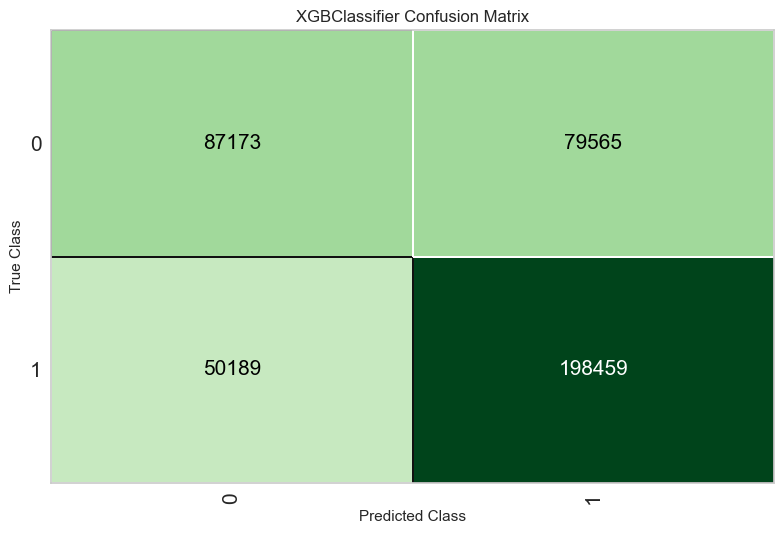

In [ ]:
plot_model(model, plot = 'confusion_matrix')

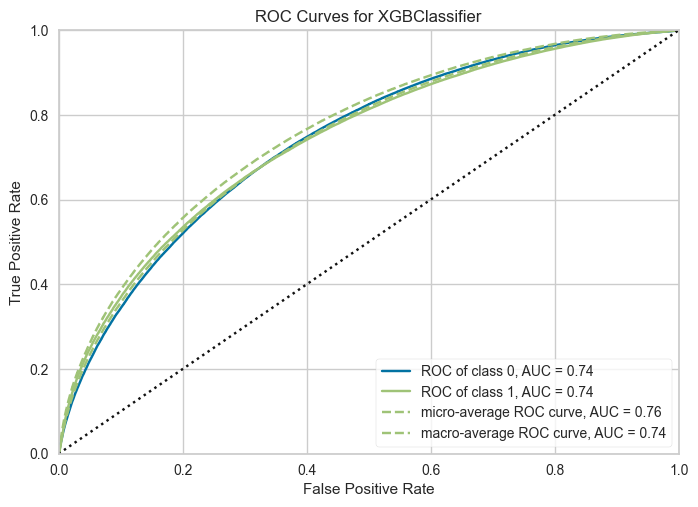

In [ ]:
plot_model(model)

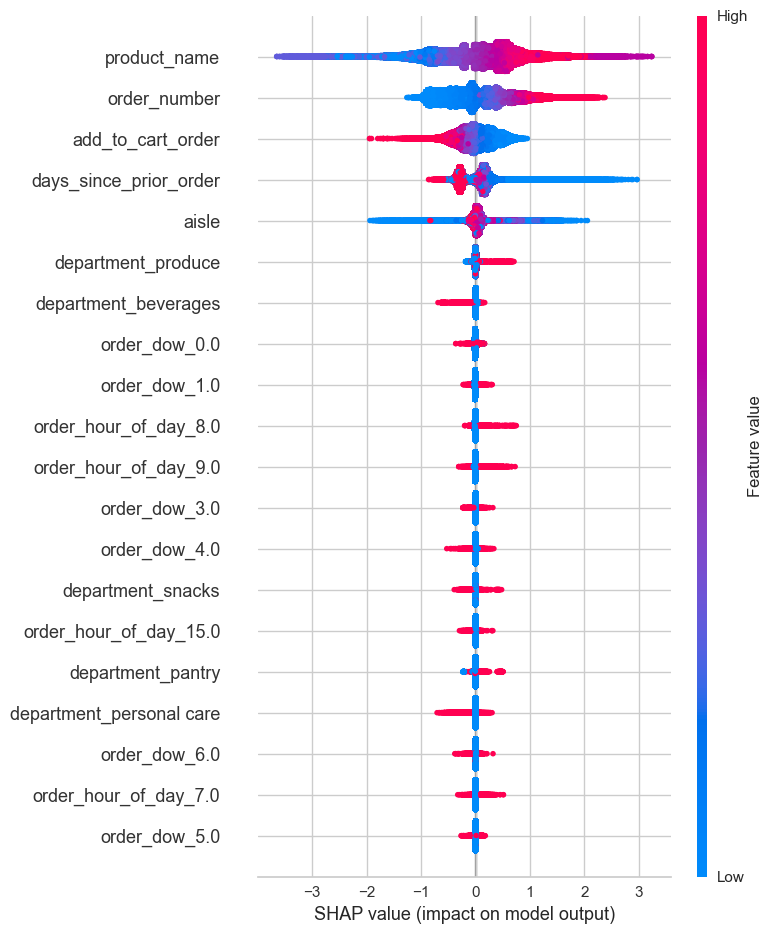

In [ ]:
interpret_model(model)
